<a href="https://colab.research.google.com/github/Jair-RM/Simulacion-2-Figols/blob/main/Ejercicio_13_SEPTIEMBRE_(Max_tasa_modelo_Vasicek).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import math
from math import factorial
from math import log, exp, sqrt
import random as rnd
from random import random, gauss
import numpy as np
import matplotlib.pyplot as plt
#from numba import jit
from statistics import mean, stdev

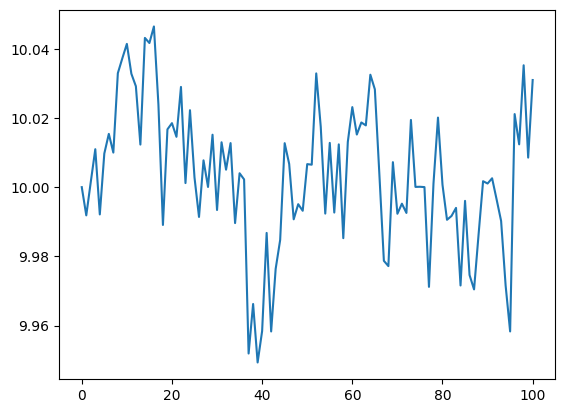

In [8]:
# Con los mismos parametros utilizados en clase para el modelo de Vasicek, estime por simulacion el valor esperado del maximo de la tasa de interes durante los primeros 30 dias.
# De un intervalo de confianza del 90% para el maximo calculado
# dXt = c(Xt - M)dt + sigma*dWt
def trayectoria(u, o, c, x0, T):
  ly=[x0]
  lt=[0]
  i=1
  for i in range(T):
    x=ly[i]
    desv=sqrt((-1/(2*c))*(exp(-2*c)-1))
    integral=c*gauss(0, desv)
    x=exp(c)*(x+u*(exp(-c)-1)+o*integral)
    ly.append(x)
    lt.append(i+1)
  return lt, ly
u=10.
o=0.04
c=-0.5
T=100
x0=10
for i in range(1):
  lt, ly=trayectoria(u, o, c, x0, T)
  plt.plot(lt, ly)
plt.show()

In [15]:
def maxi(u, o, c, x0, T):
  ly=[x0]
  lt=[0]
  i=1
  for i in range(T):
    x=ly[i]
    desv=sqrt((-1/(2*c))*(exp(-2*c)-1))
    integral=gauss(0, desv)
    x=exp(c)*(x+u*(exp(-c)-1)+o*integral)
    ly.append(x)
    lt.append(i+1)
  return max(ly)
u=10.
o=0.04
c=-0.5
T=30
x0=10
nr=1000000
l=[]
for i in range(nr):
  l.append(maxi(u, o, c, x0, T))
m=mean(l)
st=stdev(l)
print(m)
print(np.quantile(l, 0.05), np.quantile(l, 0.95))
print(m-1.65*st/sqrt(nr), m+1.65*st/sqrt(nr))

10.074253088771698
10.038549922418415 10.114443379941155
10.074214909909296 10.0742912676341
